In [2]:
import pandas as pd

# Load dataset
house_df = pd.read_csv('Housing_Price.csv')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
house_df.shape

(545, 13)

In [11]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
house_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [3]:
print(house_df.describe(include='all'))

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

In [ ]:
# Check for missing values
print(house_df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


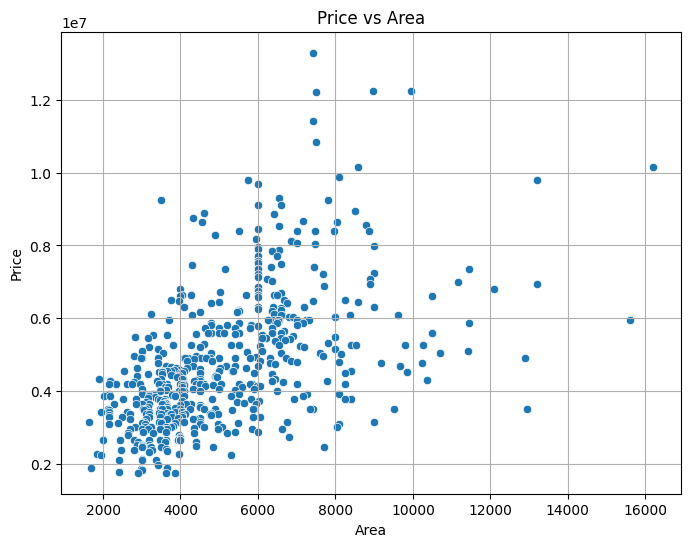

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: price vs area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=house_df)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

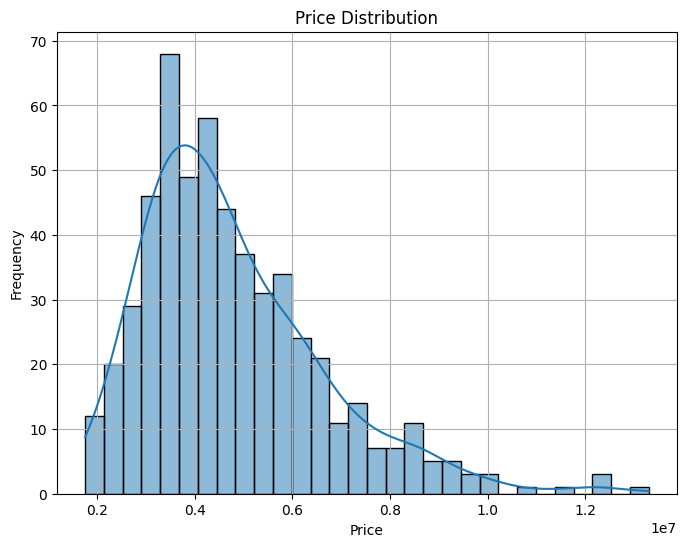

In [6]:
# Histogram: price distribution
plt.figure(figsize=(8, 6))
sns.histplot(house_df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

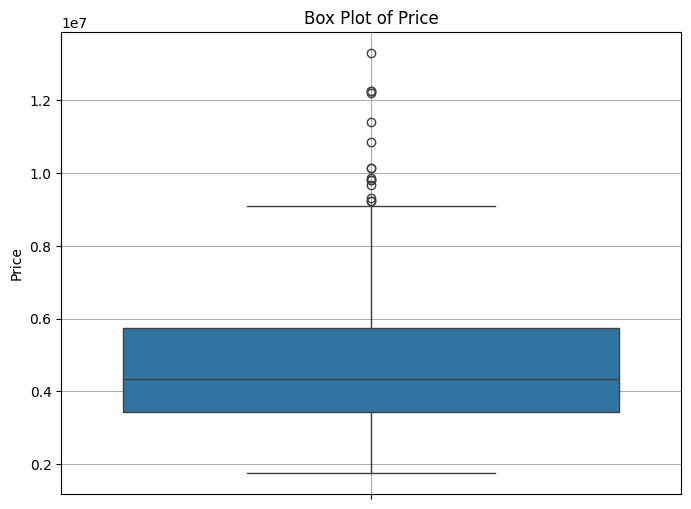

In [7]:
# Box plot: price
plt.figure(figsize=(8, 6))
sns.boxplot(y='price', data=house_df)
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.grid(True)
plt.show()

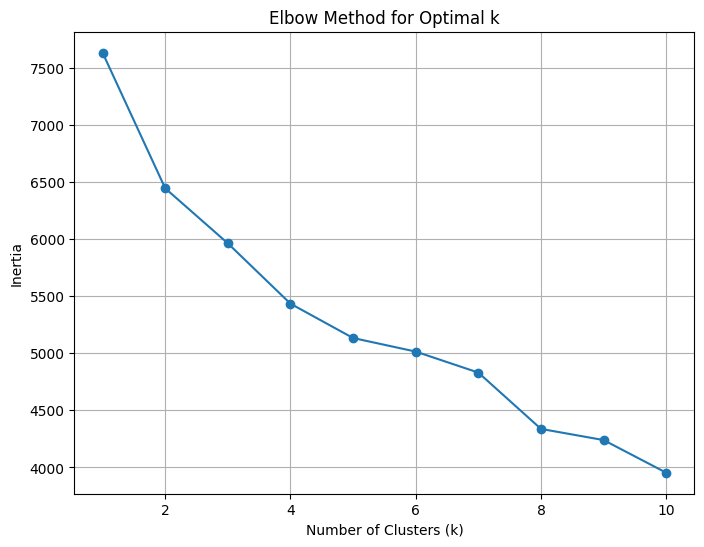

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# One-hot encode categorical variables
df_encoded = pd.get_dummies(house_df, drop_first=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    sil_score = silhouette_score(scaled_data, labels)
    db_index = davies_bouldin_score(scaled_data, labels)
    
    print(f"k={k} | Silhouette Score: {sil_score:.2f} | Davies Bouldin Index: {db_index:.2f}")


k=2 | Silhouette Score: 0.17 | Davies Bouldin Index: 2.27
k=3 | Silhouette Score: 0.16 | Davies Bouldin Index: 2.31
k=4 | Silhouette Score: 0.14 | Davies Bouldin Index: 2.09
k=5 | Silhouette Score: 0.14 | Davies Bouldin Index: 2.11
k=6 | Silhouette Score: 0.15 | Davies Bouldin Index: 2.11
k=7 | Silhouette Score: 0.13 | Davies Bouldin Index: 2.22
k=8 | Silhouette Score: 0.15 | Davies Bouldin Index: 1.91
k=9 | Silhouette Score: 0.15 | Davies Bouldin Index: 2.06
k=10 | Silhouette Score: 0.16 | Davies Bouldin Index: 2.01
